<a href="https://colab.research.google.com/github/GHermano-17/CTEIA_LISTA03_AMA/blob/main/lista03_AMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.io import arff

In [ ]:
url = "https://raw.githubusercontent.com/GHermano-17/data_lista03_ama/refs/heads/main/vehicle.csv"

In [ ]:
# Carregar o arquivo .arff
df = pd.read_csv(url, header=None)

# Criar lista com os nomes das colunas
column_names = [f'feat_{i}' for i in range(18)] + ['class']

# Atribuir ao DataFrame
df.columns = column_names

### Visualizando os dados:

In [ ]:
print(df.shape)
df.head(10)

(846, 19)


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,3.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,3.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,2.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,3.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,0.0
5,107.0,57.0,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,0.0
6,97.0,43.0,73.0,173.0,65.0,6.0,153.0,42.0,19.0,143.0,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204.0,0.0
7,90.0,43.0,66.0,157.0,65.0,9.0,137.0,48.0,18.0,146.0,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202.0,3.0
8,86.0,34.0,62.0,140.0,61.0,7.0,122.0,54.0,17.0,127.0,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208.0,3.0
9,93.0,44.0,98.0,197.0,62.0,11.0,183.0,36.0,22.0,146.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204.0,2.0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_0   846 non-null    float64
 1   feat_1   846 non-null    float64
 2   feat_2   846 non-null    float64
 3   feat_3   846 non-null    float64
 4   feat_4   846 non-null    float64
 5   feat_5   846 non-null    float64
 6   feat_6   846 non-null    float64
 7   feat_7   846 non-null    float64
 8   feat_8   846 non-null    float64
 9   feat_9   846 non-null    float64
 10  feat_10  846 non-null    float64
 11  feat_11  846 non-null    float64
 12  feat_12  846 non-null    float64
 13  feat_13  846 non-null    float64
 14  feat_14  846 non-null    float64
 15  feat_15  846 non-null    float64
 16  feat_16  846 non-null    float64
 17  feat_17  846 non-null    float64
 18  class    846 non-null    float64
dtypes: float64(19)
memory usage: 125.7 KB


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,class
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388,1.469267
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797,1.111905
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000,0.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000,1.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000,2.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000,3.000000


In [ ]:
df.iloc[:, -1].value_counts()

,count
class,
0.0,218
2.0,217
1.0,212
3.0,199


3.0 = Van

2.0 = Saab

1.0 = Opel

0.0 = Bus

## Item a)

### Pré-processamento:

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Criar a instância do StandardScaler
scaler = StandardScaler()

# Aplicar nos dados
X_scaled = scaler.fit_transform(X)

In [ ]:
# Criar a instãncia do StratifiedKFold:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1709)

# Criar um dicionário para armazenar os resultados de cada modelo:
results = {}

Grids de Hiperparâmetros:

In [28]:
# Grid MLP:
param_grid_mlp = {
    "hidden_layer_sizes": [(50,), (100,), (100, 50), (100, 100)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate_init": [0.001, 0.01]
}

# Grid SVM:
# linear:
param_grid_svm_rbf_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}
# poly:
param_grid_svm_poly = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Grid RF:
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# Grid GB:
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

### GridSeachCV com múltiplas métricas:

In [ ]:
# Definir métricas:

scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1709, shuffle=True),
             estimator=MLPClassifier(max_iter=500, random_state=1709),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (100, 50),
                                                (100, 100)],
                         'learning_rate_init': [0.001, 0.01]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro'},
             verbose=2)

In [29]:
# GridSearchCV para MLP:
# Criar modelo base:
mlp = MLPClassifier(max_iter=1000, random_state=1709)

# Criar GridSearchCV
grid_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    scoring=scoring, # Dicionário de métricas
    refit='accuracy', # Usa accuracy para escolher o melhor modelo
    cv=skf, # Usa o StratifiedKFold
    n_jobs=-1, # Usa todos os cores
    verbose=2, # Mostra o processo
    return_train_score=True
)

# Treinar
grid_mlp.fit(X_scaled, y)

# Visualizando os melhores hiperparâmetros:
print("Melhores hiperparâmetros MLP:")
print(grid_mlp.best_params_)

# Ver o melhor score (accuracy)
print("\nMelhor accuracy (média CV):")
print(grid_mlp.best_score_)

# Visualizar métricas dos 5 folds:
# Pegar o índice do melhor modelo
best_index = grid_mlp.best_index_

# Extrair as métricas
results_mlp = {
    'accuracy': grid_mlp.cv_results_[f'mean_test_accuracy'][best_index],
    'accuracy_std': grid_mlp.cv_results_[f'std_test_accuracy'][best_index],
    'precision_macro': grid_mlp.cv_results_[f'mean_test_precision_macro'][best_index],
    'precision_std': grid_mlp.cv_results_[f'std_test_precision_macro'][best_index],
    'recall_macro': grid_mlp.cv_results_[f'mean_test_recall_macro'][best_index],
    'recall_std': grid_mlp.cv_results_[f'std_test_recall_macro'][best_index],
    'f1_macro': grid_mlp.cv_results_[f'mean_test_f1_macro'][best_index],
    'f1_std': grid_mlp.cv_results_[f'std_test_f1_macro'][best_index]
}

print("\nResultados MLP:")
print(results_mlp)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores hiperparâmetros MLP:
{'activation': 'relu', 'alpha': 0.2, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'n_iter_no_change': 10, 'validation_fraction': 0.1}

Melhor accuracy (média CV):
0.701009397841977

Resultados MLP:
{'accuracy': np.float64(0.701009397841977), 'accuracy_std': np.float64(0.037298234432847494), 'precision_macro': np.float64(0.6880137354179576), 'precision_std': np.float64(0.04107296036305096), 'recall_macro': np.float64(0.7053750900262528), 'recall_std': np.float64(0.03583472044804223), 'f1_macro': np.float64(0.6857341044007258), 'f1_std': np.float64(0.03829281256174206)}
RESULTADOS APÓS CORREÇÃO DO OVERFITTING
Melhores hiperparâmetros: {'activation': 'relu', 'alpha': 0.2, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'n_iter_no_change': 10, 'validation_fraction': 0.1}
Acurácia TREINO:     72.70%
Acurácia VALIDAÇÃO:  70.10%
D

In [27]:
# Reexecutar MLP COM train scores
grid_mlp_full = GridSearchCV(
    estimator=MLPClassifier(max_iter=500, random_state=42),
    param_grid=param_grid_mlp,
    scoring=scoring,
    refit='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=1,
    return_train_score=True  # ← MUDANÇA AQUI!
)

grid_mlp_full.fit(X_scaled, y)

# Extrair scores de treino e validação do melhor modelo
best_idx = grid_mlp_full.best_index_

train_acc = grid_mlp_full.cv_results_['mean_train_accuracy'][best_idx]
val_acc = grid_mlp_full.cv_results_['mean_test_accuracy'][best_idx]
train_f1 = grid_mlp_full.cv_results_['mean_train_f1_macro'][best_idx]
val_f1 = grid_mlp_full.cv_results_['mean_test_f1_macro'][best_idx]

print("="*60)
print("ANÁLISE DE OVERFITTING/UNDERFITTING - MLP")
print("="*60)
print(f"Acurácia TREINO:     {train_acc*100:.2f}%")
print(f"Acurácia VALIDAÇÃO:  {val_acc*100:.2f}%")
print(f"Diferença:           {(train_acc - val_acc)*100:.2f}%")
print()
print(f"F1-Score TREINO:     {train_f1*100:.2f}%")
print(f"F1-Score VALIDAÇÃO:  {val_f1*100:.2f}%")
print(f"Diferença:           {(train_f1 - val_f1)*100:.2f}%")
print("="*60)

# Interpretação
diff = (train_acc - val_acc) * 100
if diff < 2:
    print("✅ EXCELENTE: Modelo bem generalizado (diferença < 2%)")
elif diff < 5:
    print("✅ BOM: Pequeno overfitting aceitável (diferença < 5%)")
elif diff < 10:
    print("⚠️ ATENÇÃO: Overfitting moderado (diferença 5-10%)")
else:
    print("❌ PROBLEMA: Overfitting severo (diferença > 10%)")

if val_acc < 0.6:
    print("⚠️ ATENÇÃO: Possível underfitting (acurácia validação < 60%)")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
ANÁLISE DE OVERFITTING/UNDERFITTING - MLP
Acurácia TREINO:     99.85%
Acurácia VALIDAÇÃO:  85.58%
Diferença:           14.27%

F1-Score TREINO:     99.85%
F1-Score VALIDAÇÃO:  85.66%
Diferença:           14.19%
❌ PROBLEMA: Overfitting severo (diferença > 10%)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# GridSearch para SVM rbf linear:
svm = SVC(random_state=1709)

# GridSearchCV:
grid_svm_rbf_linear = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm_rbf_linear,
    scoring=scoring,
    refit='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=1,
    return_train_score=False
)

# Treinar:
grid_svm_rbf_linear.fit(X_scaled, y)

# Visualizando os melhores hiperparâmetros:
print("Melhores hiperparâmetros SVM linear:")
print(grid_svm_rbf_linear.best_params_)

# Ver o melhor score (accuracy)
print("\nMelhor accuracy (média CV):")
print(grid_svm_rbf_linear.best_score_)

# Visualizar métricas dos 5 folds:
# Pegar o índice do melhor modelo
best_index = grid_svm_rbf_linear.best_index_

# Extrair as métricas
results_svm_linear = {
    'accuracy': grid_svm_rbf_linear.cv_results_[f'mean_test_accuracy'][best_index],
    'accuracy_std': grid_svm_rbf_linear.cv_results_[f'std_test_accuracy'][best_index],
    'precision_macro': grid_svm_rbf_linear.cv_results_[f'mean_test_precision_macro'][best_index],
    'precision_std': grid_svm_rbf_linear.cv_results_[f'std_test_precision_macro'][best_index],
    'recall_macro': grid_svm_rbf_linear.cv_results_[f'mean_test_recall_macro'][best_index],
    'recall_std': grid_svm_rbf_linear.cv_results_[f'std_test_recall_macro'][best_index],
    'f1_macro': grid_svm_rbf_linear.cv_results_[f'mean_test_f1_macro'][best_index],
    'f1_std': grid_svm_rbf_linear.cv_results_[f'std_test_f1_macro'][best_index]
}

print("\nResultados SVM RBF/Linear:")
print(results_svm_linear)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores hiperparâmetros SVM linear:
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

Melhor accuracy (média CV):
0.8452001392272885

Resultados SVM RBF/Linear:
{'accuracy': np.float64(0.8452001392272885), 'accuracy_std': np.float64(0.023098176425885245), 'precision_macro': np.float64(0.8453332887993668), 'precision_std': np.float64(0.022699781339378017), 'recall_macro': np.float64(0.8466457767039163), 'recall_std': np.float64(0.02332448485083166), 'f1_macro': np.float64(0.8451735715574215), 'f1_std': np.float64(0.02348486111319235)}


In [15]:
# GridSearch para SVM Poly:

svm_poly = SVC(random_state=1709)

grid_svm_poly = GridSearchCV(
    estimator=svm_poly,
    param_grid=param_grid_svm_poly,
    scoring=scoring,
    refit='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=1,
    return_train_score=False
)

# Treinar
grid_svm_poly.fit(X_scaled, y)

# Visualizando os melhores hiperparâmetros:
print("Melhores hiperparâmetros SVM linear:")
print(grid_svm_poly.best_params_)

# Ver o melhor score (accuracy)
print("\nMelhor accuracy (média CV):")
print(grid_svm_poly.best_score_)

# Visualizar métricas dos 5 folds:
# Pegar o índice do melhor modelo
best_index = grid_svm_poly.best_index_

# Extrair as métricas
results_svm_poly = {
    'accuracy': grid_svm_poly.cv_results_[f'mean_test_accuracy'][best_index],
    'accuracy_std': grid_svm_poly.cv_results_[f'std_test_accuracy'][best_index],
    'precision_macro': grid_svm_poly.cv_results_[f'mean_test_precision_macro'][best_index],
    'precision_std': grid_svm_poly.cv_results_[f'std_test_precision_macro'][best_index],
    'recall_macro': grid_svm_poly.cv_results_[f'mean_test_recall_macro'][best_index],
    'recall_std': grid_svm_poly.cv_results_[f'std_test_recall_macro'][best_index],
    'f1_macro': grid_svm_poly.cv_results_[f'mean_test_f1_macro'][best_index],
    'f1_std': grid_svm_poly.cv_results_[f'std_test_f1_macro'][best_index]
}

print("\nResultados SVM Poly:")
print(results_svm_poly)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores hiperparâmetros SVM linear:
{'C': 100, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}

Melhor accuracy (média CV):
0.7931709014966934

Resultados SVM Poly:
{'accuracy': np.float64(0.7931709014966934), 'accuracy_std': np.float64(0.024282975410288225), 'precision_macro': np.float64(0.7937525693870088), 'precision_std': np.float64(0.02788702382925508), 'recall_macro': np.float64(0.7950951374207188), 'recall_std': np.float64(0.024095081538029285), 'f1_macro': np.float64(0.7911131933627196), 'f1_std': np.float64(0.02553695288783912)}


Desse modo, como de maneira geral o SVM RBF Linear apresentou resultados e métricas mais consistentes que o SVM Poly, iremos tomar ele como base.

In [22]:
# Random Forest
rf = RandomForestClassifier(random_state=1709)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring=scoring,
    refit='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=1,
    return_train_score=False
)

# Treinar
grid_rf.fit(X_scaled, y)

# Visualizando os melhores hiperparâmetros:
print("Melhores hiperparâmetros RF:")
print(grid_rf.best_params_)

# Ver o melhor score (accuracy)
print("\nMelhor accuracy (média CV):")
print(grid_rf.best_score_)

# Visualizar métricas dos 5 folds:
# Pegar o índice do melhor modelo
best_index = grid_rf.best_index_

# Extrair as métricas
results_rf = {
    'accuracy': grid_rf.cv_results_[f'mean_test_accuracy'][best_index],
    'accuracy_std': grid_rf.cv_results_[f'std_test_accuracy'][best_index],
    'precision_macro': grid_rf.cv_results_[f'mean_test_precision_macro'][best_index],
    'precision_std': grid_rf.cv_results_[f'std_test_precision_macro'][best_index],
    'recall_macro': grid_rf.cv_results_[f'mean_test_recall_macro'][best_index],
    'recall_std': grid_rf.cv_results_[f'std_test_recall_macro'][best_index],
    'f1_macro': grid_rf.cv_results_[f'mean_test_f1_macro'][best_index],
    'f1_std': grid_rf.cv_results_[f'std_test_f1_macro'][best_index]
}

print("\nResultados RF:")
print(results_rf)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Melhores hiperparâmetros RF:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Melhor accuracy (média CV):
0.7600904977375565

Resultados RF:
{'accuracy': np.float64(0.7600904977375565), 'accuracy_std': np.float64(0.026159244035795844), 'precision_macro': np.float64(0.7535951215072356), 'precision_std': np.float64(0.028000297223004032), 'recall_macro': np.float64(0.7629733735256992), 'recall_std': np.float64(0.024952700583573125), 'f1_macro': np.float64(0.7532390086032519), 'f1_std': np.float64(0.02775540585147108)}


In [18]:
# Gradient Boosting:
gb = GradientBoostingClassifier(random_state=1709)

grid_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    scoring=scoring,
    refit='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=1,
    return_train_score=False
)

# Treinar
grid_gb.fit(X_scaled, y)

# Visualizando os melhores hiperparâmetros:
print("Melhores hiperparâmetros GB:")
print(grid_gb.best_params_)

# Ver o melhor score (accuracy)
print("\nMelhor accuracy (média CV):")
print(grid_gb.best_score_)

# Visualizar métricas dos 5 folds:
# Pegar o índice do melhor modelo
best_index = grid_gb.best_index_

# Extrair as métricas
results_gb = {
    'accuracy': grid_gb.cv_results_[f'mean_test_accuracy'][best_index],
    'accuracy_std': grid_gb.cv_results_[f'std_test_accuracy'][best_index],
    'precision_macro': grid_gb.cv_results_[f'mean_test_precision_macro'][best_index],
    'precision_std': grid_gb.cv_results_[f'std_test_precision_macro'][best_index],
    'recall_macro': grid_gb.cv_results_[f'mean_test_recall_macro'][best_index],
    'recall_std': grid_gb.cv_results_[f'std_test_recall_macro'][best_index],
    'f1_macro': grid_gb.cv_results_[f'mean_test_f1_macro'][best_index],
    'f1_std': grid_gb.cv_results_[f'std_test_f1_macro'][best_index]
}

print("\nResultados GB:")
print(results_gb)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Melhores hiperparâmetros GB:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}

Melhor accuracy (média CV):
0.7849147232857641

Resultados GB:
{'accuracy': np.float64(0.7849147232857641), 'accuracy_std': np.float64(0.023056030576194292), 'precision_macro': np.float64(0.7834576114898901), 'precision_std': np.float64(0.02441458518054609), 'recall_macro': np.float64(0.7874977348233163), 'recall_std': np.float64(0.021833214614776997), 'f1_macro': np.float64(0.7837818193363981), 'f1_std': np.float64(0.023359058583239084)}


## Item b)

In [23]:
# Criar dicionário com todos os resultados
resultados_finais = {
    'Modelo': ['MLP', 'SVM (RBF)', 'Random Forest', 'Gradient Boosting'],
    'Acurácia (%)': [
        f"{results_mlp['accuracy']*100:.2f} ± {results_mlp['accuracy_std']*100:.2f}",
        f"{results_svm_linear['accuracy']*100:.2f} ± {results_svm_linear['accuracy_std']*100:.2f}",
        f"{results_rf['accuracy']*100:.2f} ± {results_rf['accuracy_std']*100:.2f}",
        f"{results_gb['accuracy']*100:.2f} ± {results_gb['accuracy_std']*100:.2f}"
    ],
    'Precisão Macro (%)': [
        f"{results_mlp['precision_macro']*100:.2f} ± {results_mlp['precision_std']*100:.2f}",
        f"{results_svm_linear['precision_macro']*100:.2f} ± {results_svm_linear['precision_std']*100:.2f}",
        f"{results_rf['precision_macro']*100:.2f} ± {results_rf['precision_std']*100:.2f}",
        f"{results_gb['precision_macro']*100:.2f} ± {results_gb['precision_std']*100:.2f}"
    ],
    'Recall Macro (%)': [
        f"{results_mlp['recall_macro']*100:.2f} ± {results_mlp['recall_std']*100:.2f}",
        f"{results_svm_linear['recall_macro']*100:.2f} ± {results_svm_linear['recall_std']*100:.2f}",
        f"{results_rf['recall_macro']*100:.2f} ± {results_rf['recall_std']*100:.2f}",
        f"{results_gb['recall_macro']*100:.2f} ± {results_gb['recall_std']*100:.2f}"
    ],
    'F1-Score Macro (%)': [
        f"{results_mlp['f1_macro']*100:.2f} ± {results_mlp['f1_std']*100:.2f}",
        f"{results_svm_linear['f1_macro']*100:.2f} ± {results_svm_linear['f1_std']*100:.2f}",
        f"{results_rf['f1_macro']*100:.2f} ± {results_rf['f1_std']*100:.2f}",
        f"{results_gb['f1_macro']*100:.2f} ± {results_gb['f1_std']*100:.2f}"
    ]
}

# Criar DataFrame
df_resultados = pd.DataFrame(resultados_finais)

# Exibir tabela
print("\n" + "="*100)
print("RESULTADOS DA VALIDAÇÃO CRUZADA (5 FOLDS)")
print("="*100)
print(df_resultados.to_string(index=False))
print("="*100)


RESULTADOS DA VALIDAÇÃO CRUZADA (5 FOLDS)
           Modelo Acurácia (%) Precisão Macro (%) Recall Macro (%) F1-Score Macro (%)
              MLP 85.70 ± 2.28       86.03 ± 2.42     85.88 ± 2.21       85.83 ± 2.23
        SVM (RBF) 84.52 ± 2.31       84.53 ± 2.27     84.66 ± 2.33       84.52 ± 2.35
    Random Forest 76.01 ± 2.62       75.36 ± 2.80     76.30 ± 2.50       75.32 ± 2.78
Gradient Boosting 78.49 ± 2.31       78.35 ± 2.44     78.75 ± 2.18       78.38 ± 2.34


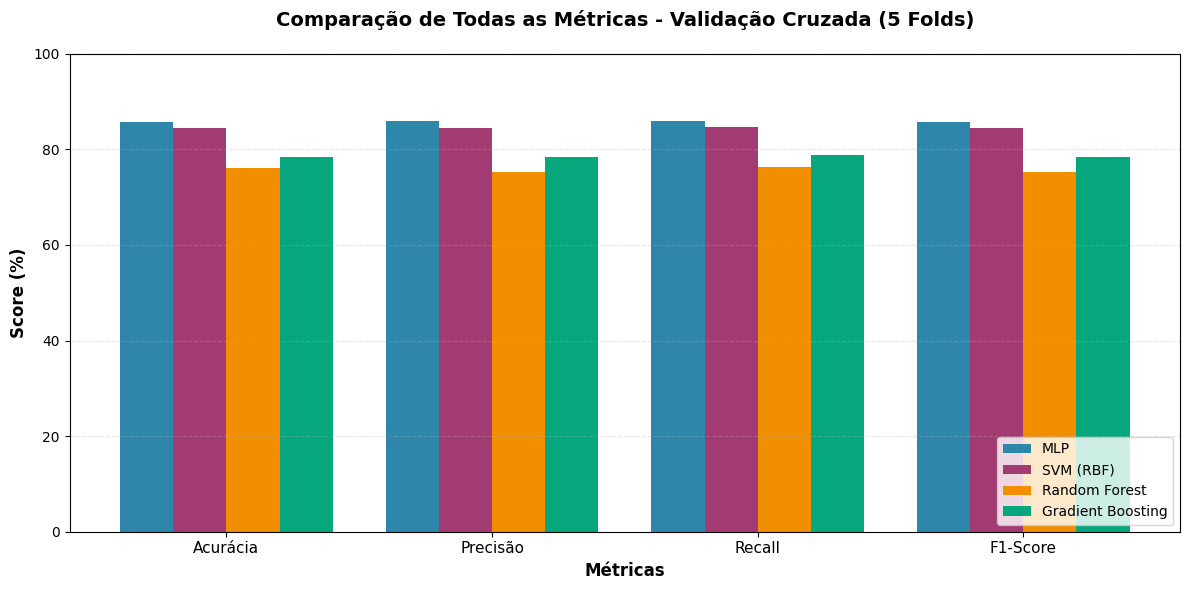

In [25]:
# Plotando Gráfico Métricas
# Preparar dados
metricas_nomes = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
mlp_scores = [results_mlp['accuracy']*100, results_mlp['precision_macro']*100,
              results_mlp['recall_macro']*100, results_mlp['f1_macro']*100]
svm_scores = [results_svm_linear['accuracy']*100, results_svm_linear['precision_macro']*100,
              results_svm_linear['recall_macro']*100, results_svm_linear['f1_macro']*100]
rf_scores = [results_rf['accuracy']*100, results_rf['precision_macro']*100,
             results_rf['recall_macro']*100, results_rf['f1_macro']*100]
gb_scores = [results_gb['accuracy']*100, results_gb['precision_macro']*100,
             results_gb['recall_macro']*100, results_gb['f1_macro']*100]

# Criar gráfico agrupado
x = np.arange(len(metricas_nomes))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - 1.5*width, mlp_scores, width, label='MLP', color='#2E86AB')
bars2 = ax.bar(x - 0.5*width, svm_scores, width, label='SVM (RBF)', color='#A23B72')
bars3 = ax.bar(x + 0.5*width, rf_scores, width, label='Random Forest', color='#F18F01')
bars4 = ax.bar(x + 1.5*width, gb_scores, width, label='Gradient Boosting', color='#06A77D')

ax.set_xlabel('Métricas', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax.set_title('Comparação de Todas as Métricas - Validação Cruzada (5 Folds)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metricas_nomes, fontsize=11)
ax.set_ylim(0, 100)
ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### Conclusão:

Desse modo, podemos observar e afirmar que a abordagem que apresentou melhor resultado foi o MLP (Multilayer Perceptron). Geralmente, RandomForest e GradientBoosting dominam problemas tabulares, são mais robustos e precisam de menos ajuste, todavia, pelo fato dataset apresentar features numéricas contínuas bem comportadas, o MLP acabou se destacando (os dados também foram normalizados com StandardScaler, fato crucial para MLP), além da regularização adequada que evitou o overfitting.